<a href="https://colab.research.google.com/github/Nguyen-Van-Truong/ML2023/blob/main/Lab_6_20130187_NguyenVanTruong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [1]:
# code
from sklearn import datasets
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from google.colab import drive
from sklearn import metrics


drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab6'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/lab6


#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# code
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=51)

print('NO USING SELECTION FEATURE')
# random forest
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

# bayes GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_bayes_Gauss = model.predict(X_test)

# SVM Linenear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print('Linenear Kernel', classification_report(y_test, y_pred_clf,digits=4))
print('Random Forest Classifier', classification_report(y_test, y_pred_rfc,digits=4))
print('Naive Bayes Gauss', classification_report(y_test, y_pred_bayes_Gauss,digits=4))


print('USING SELECTION FEATURE')
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)
features = fit.transform(X)
X_train, X_test, y_train, y_test = train_test_split(features, y, train_size=0.7, test_size=0.3, random_state=51)

# model = ExtraTreesClassifier(n_estimators=15)
# model.fit(X, y)
# print(model.feature_importances_)

# features = model.feature_importances_

# random forest
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

# bayes GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_bayes_Gauss = model.predict(X_test)

# SVM Linenear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print('Linenear Kernel', classification_report(y_test, y_pred_clf,digits=4))
print('Random Forest Classifier', classification_report(y_test, y_pred_rfc,digits=4))
print('Naive Bayes Gauss', classification_report(y_test, y_pred_bayes_Gauss,digits=4))

NO USING SELECTION FEATURE
Linenear Kernel               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        58
           1     0.8814    1.0000    0.9369        52
           2     0.9783    1.0000    0.9890        45
           3     1.0000    0.9818    0.9908        55
           4     1.0000    0.9831    0.9915        59
           5     1.0000    0.9828    0.9913        58
           6     1.0000    0.9831    0.9915        59
           7     1.0000    1.0000    1.0000        41
           8     0.9800    0.9074    0.9423        54
           9     0.9831    0.9831    0.9831        59

    accuracy                         0.9815       540
   macro avg     0.9823    0.9821    0.9816       540
weighted avg     0.9829    0.9815    0.9817       540

Random Forest Classifier               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        58
           1     0.9286    1.0000    0.9630        52
          

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Linenear Kernel               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        58
           1     0.7586    0.8462    0.8000        52
           2     0.8077    0.9333    0.8660        45
           3     0.8654    0.8182    0.8411        55
           4     0.9091    0.8475    0.8772        59
           5     0.9286    0.8966    0.9123        58
           6     0.9821    0.9322    0.9565        59
           7     0.8043    0.9024    0.8506        41
           8     0.8776    0.7963    0.8350        54
           9     0.9138    0.8983    0.9060        59

    accuracy                         0.8870       540
   macro avg     0.8847    0.8871    0.8845       540
weighted avg     0.8909    0.8870    0.8877       540

Random Forest Classifier               precision    recall  f1-score   support

           0     0.9831    1.0000    0.9915        58
           1     0.7963    0.8269    0.8113        52
           2     0.8302    0.9778    

#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
bank_data = pd.read_csv("bank.csv")

sc= StandardScaler()
bank_data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]=sc.fit_transform(bank_data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
encoder = OneHotEncoder()
encoded_data =encoder.fit_transform(bank_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data_encoded = pd.concat([bank_data, encoded_df], axis=1)
data_encoded.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

data_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685


'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81      1760\n           1       0.78      0.79      0.79      1589\n\n    accuracy                           0.80      3349\n   macro avg       0.80      0.80      0.80      3349\nweighted avg       0.80      0.80      0.80      3349\n'

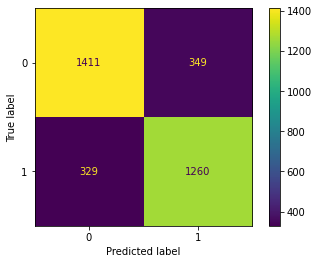

In [ ]:
data_encoded['deposit']= data_encoded['deposit'].map({'yes':1, 'no':0})
x_train, x_test, y_train, y_test = train_test_split(data_encoded.drop(['deposit'],axis=1), data_encoded['deposit'], test_size=0.3, random_state=1)
data_encoded
y_train

# decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = metrics.accuracy_score(y_test, y_predict)
tree_ps = metrics.precision_score(y_test, y_predict)
tree_rs = metrics.recall_score(y_test, y_predict)
tree_fs = metrics.f1_score(y_test, y_predict)

print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)

metrics.confusion_matrix(y_test, y_predict)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
metrics.classification_report(y_test,y_predict)

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685


'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81      1760\n           1       0.78      0.79      0.79      1589\n\n    accuracy                           0.80      3349\n   macro avg       0.80      0.80      0.80      3349\nweighted avg       0.80      0.80      0.80      3349\n'

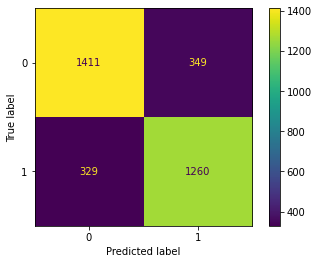

In [ ]:
# decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = metrics.accuracy_score(y_test, y_predict)
tree_ps = metrics.precision_score(y_test, y_predict)
tree_rs = metrics.recall_score(y_test, y_predict)
tree_fs = metrics.f1_score(y_test, y_predict)

print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)

metrics.confusion_matrix(y_test, y_predict)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
metrics.classification_report(y_test,y_predict)

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

creditcard = pd.read_csv("creditcard.csv")

X = creditcard.iloc[:, :-1].values
y = creditcard.iloc[:, -1].values

print('USING SELECTION FEATURE')
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)
features = fit.transform(X)
X_train, X_test, y_train, y_test = train_test_split(features, y, train_size=0.7, test_size=0.3, random_state=51)





USING SELECTION FEATURE


In [7]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

lr1 = LogisticRegression(random_state=41)
lr1.fit(X_train,y_train)
y_predl_lr = lr1.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = knn.predict(X_test)

# kernel
mnist_clf_poly = svm.SVC(kernel='poly')
mnist_clf_poly.fit(X_train, y_train)
y_pred_mnist_clf_poly = mnist_clf_poly.predict(X_test)

mnist_clf_rbf = svm.SVC(kernel='rbf')
mnist_clf_rbf.fit(X_train, y_train)
y_pred_mnist_clf_rbf = mnist_clf_rbf.predict(X_test)

mnist_clf_sigmoid = svm.SVC(kernel='sigmoid')
mnist_clf_sigmoid.fit(X_train, y_train)
y_pred_mnist_clf_sigmoid = mnist_clf_sigmoid.predict(X_test)

print('LogisticRegression',classification_report(y_test, y_predl_lr,digits=4))
print('KNN',classification_report(y_test, y_pred_knn,digits=4))
print('Descession Tree',classification_report(y_test, y_pred_dt,digits=4))

print('Linenear Kernel', classification_report(y_test, y_pred_clf,digits=4))
print('Polynomial Kernel', classification_report(y_test, y_pred_mnist_clf_poly,digits=4))
print('Function Kernel', classification_report(y_test, y_pred_mnist_clf_rbf,digits=4))
print('Sigmoid Kernel', classification_report(y_test, y_pred_mnist_clf_sigmoid,digits=4))

LogisticRegression               precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998      2845
           1     1.0000    0.7500    0.8571         4

    accuracy                         0.9996      2849
   macro avg     0.9998    0.8750    0.9285      2849
weighted avg     0.9996    0.9996    0.9996      2849

KNN               precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998      2845
           1     1.0000    0.7500    0.8571         4

    accuracy                         0.9996      2849
   macro avg     0.9998    0.8750    0.9285      2849
weighted avg     0.9996    0.9996    0.9996      2849

Descession Tree               precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998      2845
           1     1.0000    0.7500    0.8571         4

    accuracy                         0.9996      2849
   macro avg     0.9998    0.8750    0.9285      2849
weighted avg     0.9996    0.9996  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

#Finally,
Save a copy in your Github. Remember renaming the notebook.